# Random Forest

## Imports

In [1]:
import json
import yaml
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import time
import torch

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Database

In [2]:
df = pd.read_csv("database.csv")

In [3]:
df

,age,birth_date,civil_status,education_level,employer,firstname,link,lob,maiden_name,nationality,observation,occupation,surname,surname_household,household,sexe
0,25,NaN,Garçon,NaN,NaN,Cyrille,NaN,NaN,NaN,française,NaN,menuisier,Breton,NaN,0,1.0
1,30,NaN,Garçon,NaN,NaN,Auguste,NaN,NaN,NaN,Piémontaise,NaN,vitrier,NaN,Ferazzi,1,1.0
2,24,NaN,Garçon,NaN,NaN,Pierre,NaN,NaN,NaN,Piémontaise,NaN,vitrier,NaN,Machol,1,1.0
3,48,NaN,Homme marié,NaN,NaN,Alexandre,NaN,NaN,NaN,française,NaN,prop re,NaN,Desbois,1,1.0
4,30,NaN,NaN,NaN,NaN,Zélie,sa fe,NaN,NaN,française,NaN,prop re,Vignat,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25069,NaN,1869,NaN,NaN,NaN,Marie,chef,Pailharès,NaN,française,NaN,NaN,NaN,Chameton-Dideron,1,NaN
25070,NaN,1863,NaN,NaN,Cara,Marie,chef,St Naz en Royans,NaN,française,NaN,ouv chaus res,NaN,Ode,1,NaN
25071,NaN,1886,NaN,NaN,Baretto,Nello,chef,Castel,NaN,italienne,NaN,manoeuvre,NaN,Berni,1,NaN
25072,NaN,1887,NaN,NaN,NaN,Annunziata,épouse,Castel,NaN,italienne,NaN,NaN,Berni-Laureti,NaN,0,NaN


In [4]:
df.replace(np.nan, -999,  inplace=True)

## Model

In [5]:
X = df.drop(columns=['household','surname_household','surname','education_level','maiden_name'])
y = df["household"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2, 
    random_state=12,
    shuffle=True
)

In [7]:
import category_encoders as ce

list_obj_cols = X.columns[X.dtypes == "object"].tolist()

encoder = ce.OrdinalEncoder(cols=list_obj_cols)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
start_time = time.time()
rfc.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print('Training time',training_time)

/Users/ambreetienne/anaconda3/envs/env-torch/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/ambreetienne/anaconda3/envs/env-torch/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ambreetienne/anaconda3/envs/env-torch/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/ambreetienne/anaconda3/envs/env-torch/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarn

Training time 1.229043960571289


In [9]:
y_pred = rfc.predict(X_test)
fitted = rfc.predict(X_train)

/Users/ambreetienne/anaconda3/envs/env-torch/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/ambreetienne/anaconda3/envs/env-torch/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ambreetienne/anaconda3/envs/env-torch/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/ambreetienne/anaconda3/envs/env-torch/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarn

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3914
           1       0.81      0.78      0.80      1101

    accuracy                           0.91      5015
   macro avg       0.88      0.87      0.87      5015
weighted avg       0.91      0.91      0.91      5015



/Users/ambreetienne/anaconda3/envs/env-torch/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ambreetienne/anaconda3/envs/env-torch/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/ambreetienne/anaconda3/envs/env-torch/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ambreetienne/anaconda3/envs/env-torch/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed 

In [11]:
print(classification_report(y_train, fitted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15524
           1       1.00      1.00      1.00      4535

    accuracy                           1.00     20059
   macro avg       1.00      1.00      1.00     20059
weighted avg       1.00      1.00      1.00     20059



/Users/ambreetienne/anaconda3/envs/env-torch/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ambreetienne/anaconda3/envs/env-torch/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/ambreetienne/anaconda3/envs/env-torch/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ambreetienne/anaconda3/envs/env-torch/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


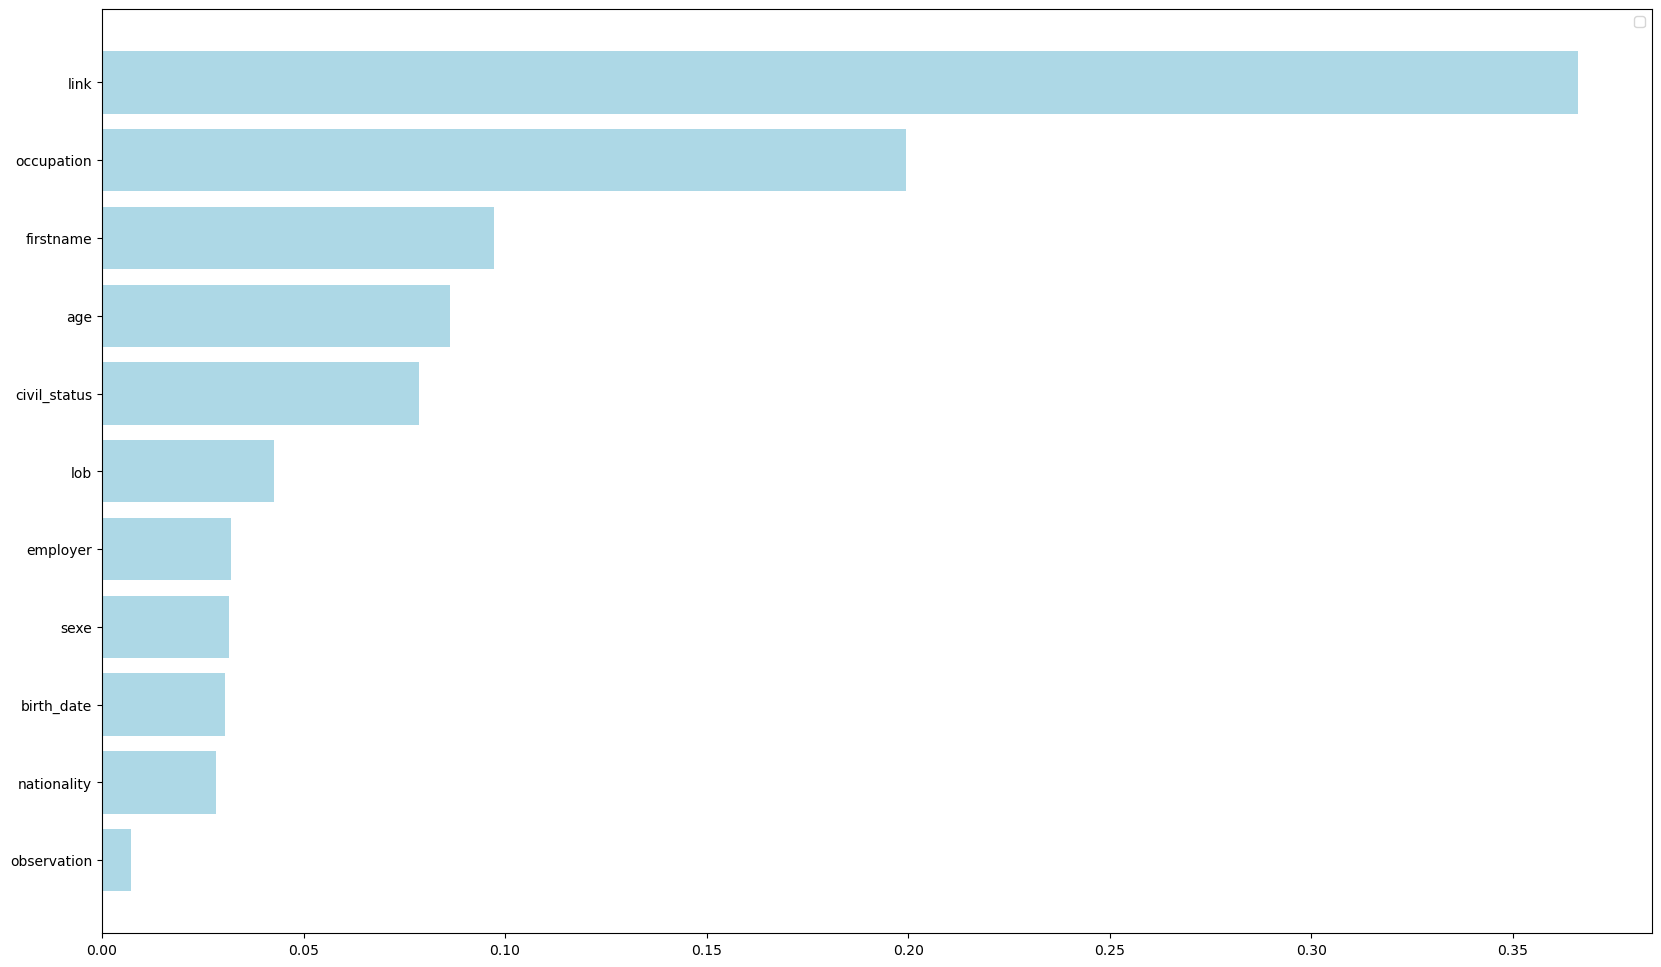

In [12]:
plt.figure(figsize=(20, 12))


sorted_feature_importance = rfc.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_feature_importance], 
         rfc.feature_importances_[sorted_feature_importance], 
         color='lightblue')

# showing the plotting
plt.legend()
plt.show()